<a href="https://colab.research.google.com/github/AlmaRosa13/Analisis_Numericos/blob/main/Cap_Interpolaci%C3%B3n%26Aproximaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolación y Aproximación**

**Interpolación por mínimos cuadrados**

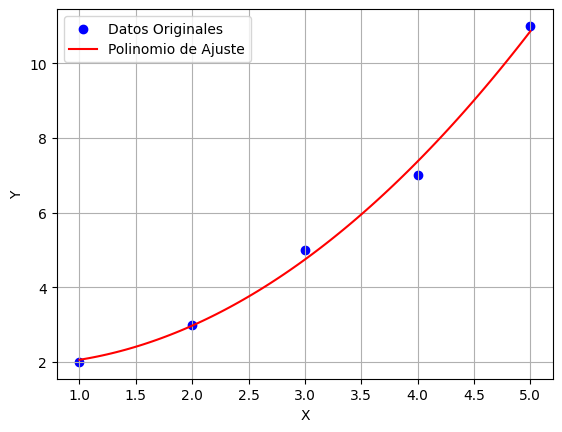

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Grado del polinomio de ajuste
grado = 2

# Realizar la interpolación por mínimos cuadrados
coeficientes = np.polyfit(x, y, grado)
polinomio = np.poly1d(coeficientes)

# Crear un conjunto de puntos para representar el polinomio ajustado
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polinomio(x_fit)

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x, y, label='Datos Originales', color='b')
plt.plot(x_fit, y_fit, label='Polinomio de Ajuste', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Interpolación lineal**

Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]
y el dato interpolado 15 ∈ [12.2,20.3]


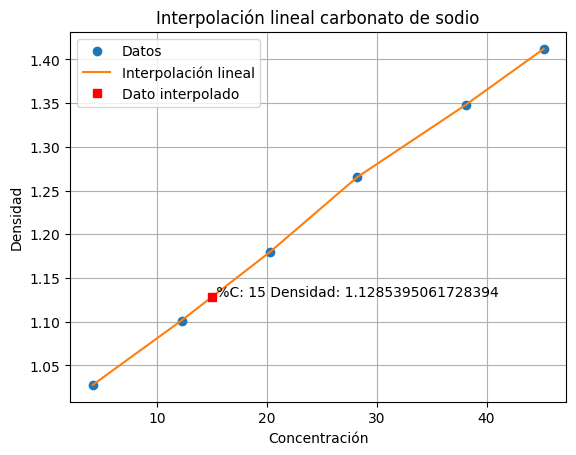

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x=np.array([4.1,12.2,20.3,28.2,38.1,45.2])
y=np.array([1.0276,1.1013,1.1801,1.2652,1.3480,1.4120])

xfino=np.linspace(4.1,45.2,100)
yi=interpolate.interp1d(x,y,kind='linear')

xi=15
yii=yi(xi)

plt.plot(x,y,'o',xfino,yi(xfino),'-',xi ,yii,'sr')
plt.legend(['Datos', 'Interpolación lineal', 'Dato interpolado'])
plt.title('Interpolación lineal carbonato de sodio')
plt.xlabel('Concentración')
plt.ylabel('Densidad')
plt.text(xi,yii,' %C: '+ str(xi) + ' Densidad: ' + str(yii))
print('Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]')
print('y el dato interpolado 15 ∈ [12.2,20.3]')
plt.grid(True)
plt.show()

**Interpolación cuadrática**

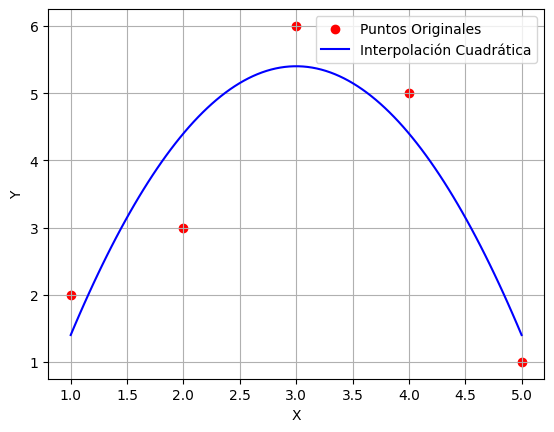

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 6, 5, 1])

# Realizar interpolación cuadrática
coefficients = np.polyfit(x, y, 2)  # Ajustar una función cuadrática (polinomio de grado 2)

# Crear una función cuadrática a partir de los coeficientes
quadratic_function = np.poly1d(coefficients)

# Generar puntos para la curva de interpolación
x_interp = np.linspace(min(x), max(x), 100)
y_interp = quadratic_function(x_interp)

# Graficar los puntos originales y la interpolación cuadrática
plt.scatter(x, y, label="Puntos Originales", color='red')
plt.plot(x_interp, y_interp, label="Interpolación Cuadrática", color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


**Interpolación de Newton**

# **Ejemplo 4.3 —** *Interpolación polinómica de Newton*. En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

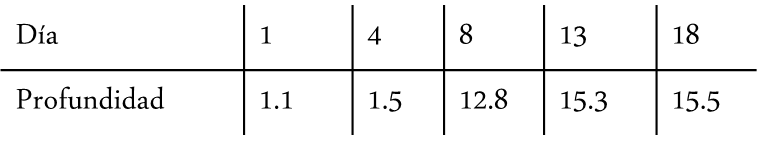

Calcular la profundidad del agua en el día 3. \\

**Solución.-** Usar la interpolación polinómica de Newton con todos los puntos de la tabla.


[[ 1.10000000e+00  1.33333333e-01  3.84523810e-01 -5.35714286e-02
   4.04341737e-03]
 [ 1.50000000e+00  2.82500000e+00 -2.58333333e-01  1.51666667e-02
   0.00000000e+00]
 [ 1.28000000e+01  5.00000000e-01 -4.60000000e-02  0.00000000e+00
   0.00000000e+00]
 [ 1.53000000e+01  4.00000000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.55000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
-0.3424369747899161
La salida nos muestra el resultado de la interpolación, la profundidad es
-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto
del problema, la altura del agua no puede ser negativa; sin embargo, es el
resultado de ajustar un polinomio con todos los datos de la tabla.


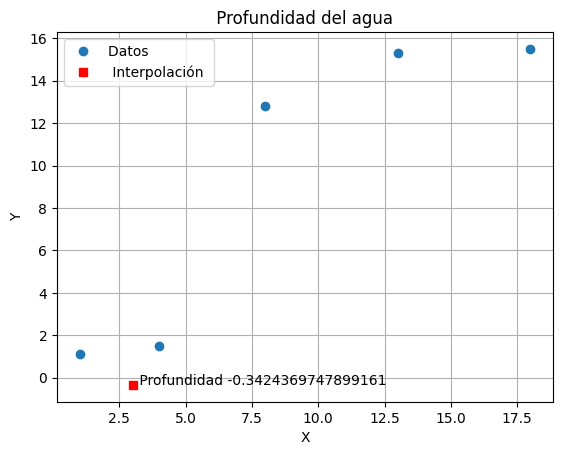

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size

t=np.zeros((n,n))
t[:,0]= y

# Genera la tabla de diferencias
for c in range(1,n):
    for r in range(0,n-c):
        t[r,c]=(t[r+1,c-1]-t[r,c-1])/(x[r+c]-x[r])
print(t)

# calcula la interpolacion de xi
xi=3
xt=1
yi=t[0,0]

for k in range(0,n-1) :
    xt = xt*(xi-x[k])
    yi = yi+t[0,k+1]*xt

print(yi)

plt.plot(x,y,'o')
plt.plot(xi,yi,'sr')
plt.text(xi+0.1,yi,' Profundidad ' + str (yi))
plt.title(' Profundidad del agua ')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Datos ',' Interpolación '])
plt.grid(True)

print('La salida nos muestra el resultado de la interpolación, la profundidad es')
print('-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto')
print('del problema, la altura del agua no puede ser negativa; sin embargo, es el')
print('resultado de ajustar un polinomio con todos los datos de la tabla.')
plt.show()

In [7]:
print('------- Polinomio de Interpolación de Newton -------')
n = int(input('Ingrese el grado del polinomio a evaluar: '))+1 #es el número de columnas-1

matriz = [0.0] * n
for i in range(n):
    matriz[i] = [0.0] * n

vector = [0.0] * n

for i in range(n):
    x = float(input('Introduce el valor de x: '))
    y = float(input('Introduce el valor para f['+str(x)+']: '))
    vector[i] = x
    matriz[i][0] = y

punto_a_evaluar = float(input('Ingrese el punto a evaluar: '))

print('------------------------------')
print('------- Calculando ... -------')

for i in range(1,n):
    for j in range(i,n):
         matriz[j][i] = ( (matriz[j][i-1]-matriz[j-1][i-1]) / (vector[j]-vector[j-i]))
print(matriz)
print(vector)

aprx = 0
mul = 1.0
for i in range(n):
    mul = matriz[i][i];
    for j in range(1,i+1):
        mul = mul * (punto_a_evaluar - vector[j-1])
    aprx = aprx + mul

print('------------------------------')
print('El valor aproximado de f(',punto_a_evaluar,') es: ', aprx)
#x=np.array([1,4,8,13,18])
#y=np.array([1.1,1.5,12.8,15.3,15.5])

------- Polinomio de Interpolación de Newton -------
Ingrese el grado del polinomio a evaluar: 4
Introduce el valor de x: 1
Introduce el valor para f[1.0]: 1.1
Introduce el valor de x: 4
Introduce el valor para f[4.0]: 1.5
Introduce el valor de x: 8
Introduce el valor para f[8.0]: 12.8
Introduce el valor de x: 13
Introduce el valor para f[13.0]: 15.3
Introduce el valor de x: 18
Introduce el valor para f[18.0]: 15.5
Ingrese el punto a evaluar: 3
------------------------------
------- Calculando ... -------
[[1.1, 0.0, 0.0, 0.0, 0.0], [1.5, 0.1333333333333333, 0.0, 0.0, 0.0], [12.8, 2.825, 0.38452380952380955, 0.0, 0.0], [15.3, 0.5, -0.25833333333333336, -0.053571428571428575, 0.0], [15.5, 0.039999999999999855, -0.04600000000000001, 0.015166666666666667, 0.004043417366946779]]
[1.0, 4.0, 8.0, 13.0, 18.0]
------------------------------
El valor aproximado de f( 3.0 ) es:  -0.3424369747899161


El polinomio de Newton es: 1.1 + 0.1333333333333333 (x-x0) + 0.38452380952380955 (x-x0)(x-x1) + -0.053571428571428575 (x-x0)(x-x1)(x-x2) + 0.004043417366946779 (x-x0)(x-x1)(x-x2)(x-x3)


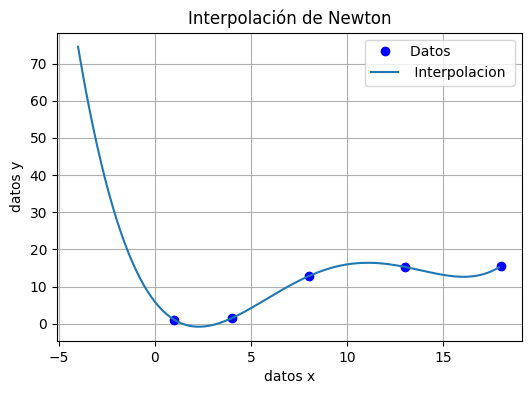

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    #Función para calcular la tabla de diferencias divididas
    n = len(y)
    coef = np.zeros([n, n])
    # La primera columna es y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    #Evaluar el polinomio de newton en x
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

#Datos
x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])

# Obtener los coeficientes de diferencia dividida
a_s = divided_diff(x, y)[0, :]
print('El polinomio de Newton es:', a_s[0],'+', a_s[1],'(x-x0)','+',a_s[2],'(x-x0)(x-x1)','+',a_s[3],'(x-x0)(x-x1)(x-x2)','+',a_s[4],'(x-x0)(x-x1)(x-x2)(x-x3)')

# Evaluar nuevos puntos de datos
x_new = np.arange(-4, 18, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Interpolación de Newton')
plt.legend([ 'Datos ',' Interpolacion '])
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.grid( True )
plt.show()

**Interpolación de Lagrange**

# **Ejemplo 4.4 —** *Interpolación polinómica de Lagrange.* En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

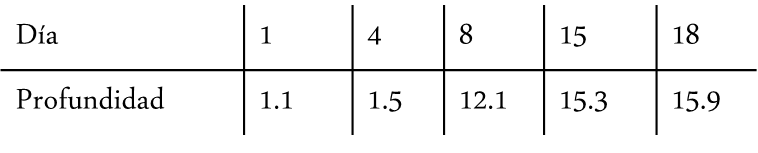

Calcular la profundidad del agua en el día 3. \\

**Solución** \\
Usemos la interpolación polinómica de Newton con todos los puntos de la tabla

La profundidad usando la fórmula es: -0.34243697478991597
La profundidad usando la función de python es: -0.3424369747899192


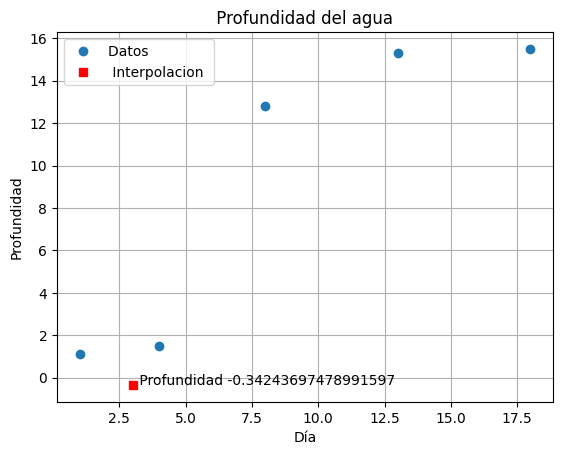

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size
xi=3
yi=0
# Calcula los factores de Lagrange y hace la suma
for i in range(0,n):
    producto = y[i]
    for j in range(0,n):
      if i!= j:
          producto = producto * (xi - x[j]) /(x[i]-x[j]);
    yi = yi + producto

print('La profundidad usando la fórmula es:', yi)
f= interpolate.lagrange(x,y) # usando la funcion de Lagrange de scipy
print('La profundidad usando la función de python es:',f(xi))

plt.plot(x,y, 'o')
plt.plot(xi ,yi , 'sr ')
plt.text(xi +0.1 ,yi , ' Profundidad ' + str (yi))
plt.title( ' Profundidad del agua ')
plt.xlabel('Día')
plt.ylabel('Profundidad')
plt.legend([ 'Datos ',' Interpolacion '])
plt.grid( True )
plt.show()

Valores de fi:  [ 1.1  1.5 12.8 15.3 15.5]
Divisores en L(i):  [ 4284. -1512.  1400. -2700. 11900.]

Polinomio de Lagrange: 
0.00404341736694678*x**4 - 0.158700280112045*x**3 + 1.94220028011205*x**2 - 6.58865266106443*x + 5.90110924369748


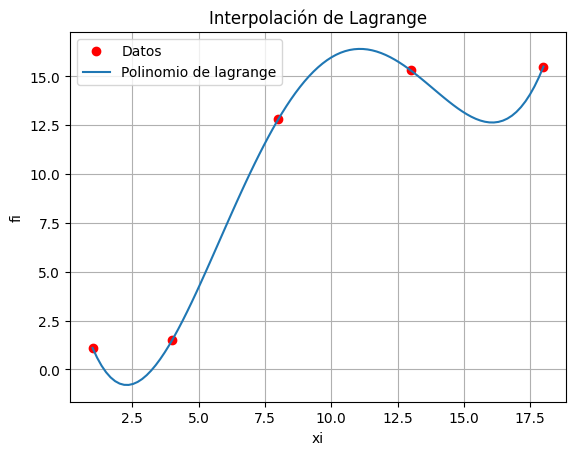

In [11]:
# Interpolación de Lagrange
# Los divisoresL solo mostrarán valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#INGRESO
# Datos de prueba
xi=np.array([1,4,8,13,18])
fi=np.array([1.1,1.5,12.8,15.3,15.5])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):

    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# Simplifica el polinomio
polisimple = polinomio.expand()

# Evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('Valores de fi: ',fi)
print('Divisores en L(i): ',divisorL)
#print()
#print('Polinomio de Lagrange, expresiones')
#print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'or', label = 'Datos')
plt.plot(pxi,pfi, label = 'Polinomio de lagrange')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()

**Interpolación Segmentada**

**Spline Cúbico**

0.046119184615384626


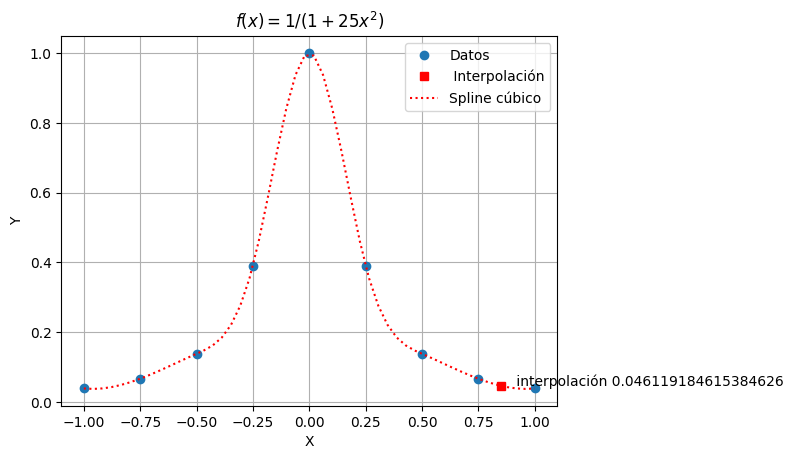

In [12]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x=np.array([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
y=np.array([0.03846,0.06639,0.13793,0.39024,1,0.39024,0.13793,0.06639,0.03846])

f=interpolate.interp1d(x,y,'cubic')

xs=np.linspace(-1,1,50)
ys=f(xs)
xi =0.85
yi=f(xi)

print(yi)

plt.plot(x,y,'o',label='Datos')
plt.plot(xi,yi,'sr',label=' Interpolación')
plt.plot(xs ,ys , 'r:',label='Spline cúbico')
plt.text(xi +0.05,yi ,' interpolación ' + str (yi))
plt.title('$f(x)=1/(1+25 x^2)$')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

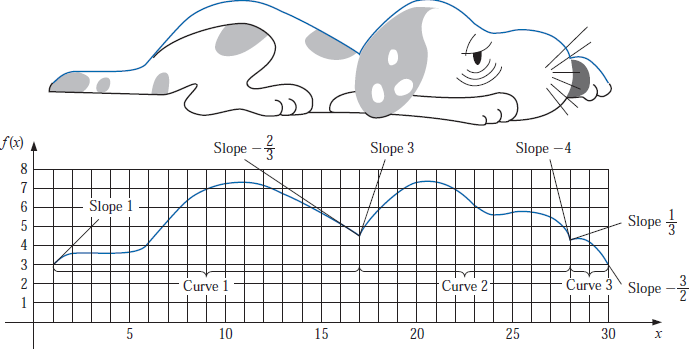

Polinomios por tramos: 
 x = [1.0,2.0]
-0.0857236959348446*x**3 + 0.257171087804534*x**2 + 0.528552608130311*x + 2.3
 x = [2.0,5.0]
0.0344030357722175*x**3 - 0.463589302437839*x**2 + 1.97007338861506*x + 1.3389861463435
 x = [5.0,6.0]
0.333135718701598*x**3 - 4.94457954637854*x**2 + 24.3750246083186*x - 36.002599219829
 x = [6.0,7.0]
-0.570591061798835*x**3 + 11.3225025026292*x**2 - 73.2274676857281*x + 159.202385368264
 x = [7.0,8.0]
0.149228528493742*x**3 - 3.79370889351486*x**2 + 32.5860120872806*x - 87.6957341020893
 x = [8.0,10.0]
0.0339752893722334*x**3 - 1.02763115459866*x**2 + 10.457390175951*x - 28.6860756718771
 x = [10.0,13.0]
-0.0228410898540091*x**3 + 0.67686022218861*x**2 - 6.58752359192173*x + 28.1303035543654
 x = [13.0,17.0]
0.0547099687169669*x**3 - 2.34763106207945*x**2 + 32.7308631035631*x - 142.249372126069
 x = [17.0,20.0]
-0.0932609516217995*x**3 + 5.19888587519763*x**2 - 95.5599248301474*x + 584.73175949829
 x = [20.0,23.0]
0.0453272705258336*x**3 - 3.1164074536

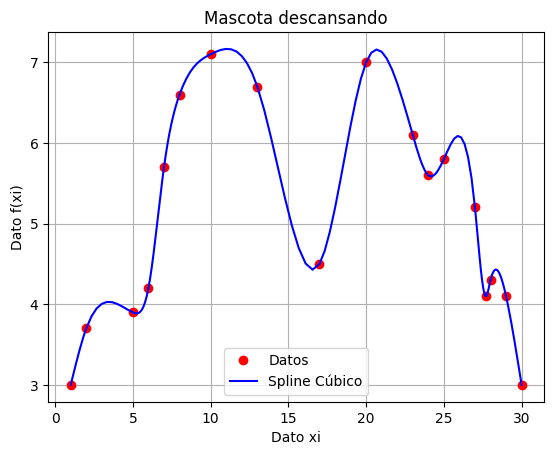

In [13]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)

    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
xi = np.array([1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30])
fi = np.array([3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='Datos')
plt.plot(xtraza,ytraza, label='Spline Cúbico'
         , color='blue')
plt.title('Mascota descansando')
plt.xlabel('Dato xi')
plt.ylabel('Dato f(xi)')
plt.legend()
plt.grid( True )
plt.show()